# EE 5020 Homework 1: Visualizing distributions and basic regression modeling

In this homework, you'll practice programming with the scientific Python stack (NumPy, SciPy, pandas, statsmodels, matplotlib, seaborn) and getting what you already know (or are re-learning) about statistics down in a structured manner.

You can add as many cells as you need by using the "plus" icon above.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Section 1: Toy demonstration problems

In this section, we'll practice programming by creating more toy problems to solve.  In particular, we'll try using multiple features rather than a single feature to create an output (response).

Let's create a multiple regression model to estimate data from the multivariate equation: $y = 5 x_1 + 7 x_2 - 3 x_3$

**Problem 1:** Using good variable names to allow for the number of samples of $y, x_1, x_2, x_3$ to be easily changed, create your necessary data objects to set up your problem.  Then, plot your data to make sure that it matches the given equation.

How many samples (length of $x$ and $y$ vectors) do you need to make sure that you have enough information to solve this problem?

In [67]:
x1 = np.linspace(start=-100., stop=-5., num=100)
x2 = np.linspace(start=0., stop=50., num=100)
x3 = np.linspace(start=100., stop=1000., num=100)
y = 5 * x1 + 7 * x2 - 3 * x3

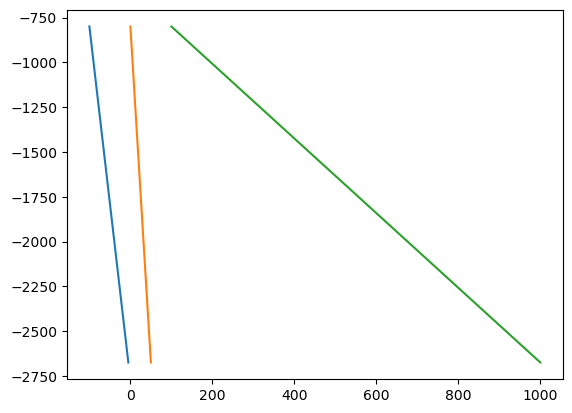

In [43]:
plt.plot(x1, y, x2, y, x3, y)

In [8]:
bx1 = np.linspace(start=-100., stop=100., num=100)
bx2 = np.linspace(start=-100., stop=100., num=100)
bx3 = np.linspace(start=-100., stop=100., num=100)
by = 5 * bx1 + 7 * bx2 - 3 * bx3

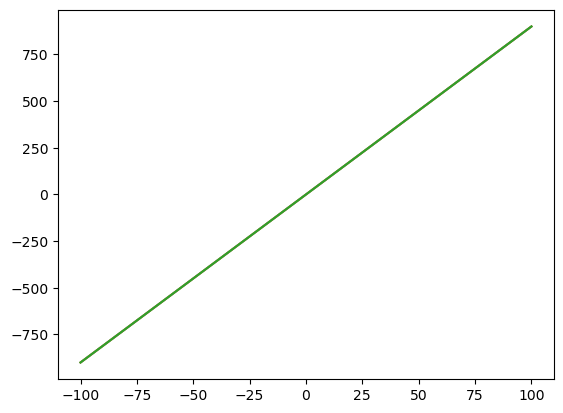

In [9]:
plt.plot(bx1, by, bx2, by, bx3, by)

**Problem 2:** Now, create a regression model using Ordinary Least Squares on your exact data with no noise yet added.  Double-check all of the coefficients.  You may find using the Formula API simpler, but if you would like to use the machine learning API then make sure to have $x_1, x_2, x_3$ all in one matrix (ndarray).

In [68]:
import pandas as pd

df_X = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "x3": x3
})
df_X.head()

,x1,x2,x3
0,-100.000000,0.000000,100.000000
1,-99.040404,0.505051,109.090909
2,-98.080808,1.010101,118.181818
3,-97.121212,1.515152,127.272727
4,-96.161616,2.020202,136.363636


In [16]:
vstack_X = np.vstack([x1, x2, x3])
vstack_X.shape

(3, 100)

In [69]:
import statsmodels.regression.linear_model as slm
import statsmodels.api as sm

model_perfect = slm.OLS(endog=y, exog=df_X)
model_perfect_results = model_perfect.fit()
model_perfect_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.270e+32
Date:                Wed, 21 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:31:57   Log-Likelihood:                 2765.7
No. Observations:                 100   AIC:                            -5527.
Df Residuals:                      98   BIC:                            -5522.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.3450   4.99e-16   1.07e+16      0.000       5.345       5.345
x2             0.1352   2.65e-17   5.09e+15      0.000       0.135       0.135
x3            -2.6550   4.79e-17  -5.55e+16      0.000      -2.655      -2.655
==============================================================================
Omnibus:                       10.004   Durbin-Watson:                   0.695
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.623
Skew:                          -0.486   Prob(JB):                       0.0365
Kurtosis:                       2.197   Cond. No.                     2.09e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.54e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Problem 3:** Now, add some Gaussian noise to your $y$ vector (make a new variable so you don't overwrite your exact data).  Then, run OLS, but keep changing the sample size until you get very tight (within 1e-2 for your confidence intervals).  How many samples did you need?

In [70]:
the_rng = np.random.default_rng(seed=7)
matrix_noise = the_rng.normal(loc=0.0, scale=10.0, size=df_X.shape)
matrix_noise.shape

(100, 3)

In [71]:
df_noisy_X = df_X + matrix_noise

In [72]:
(df_noisy_X - matrix_noise) == df_X

,x1,x2,x3
0,True,True,True
1,True,False,True
2,True,False,True
3,True,False,True
4,True,False,True
...,...,...,...
95,True,True,True
96,True,True,True
97,True,True,True
98,True,True,True


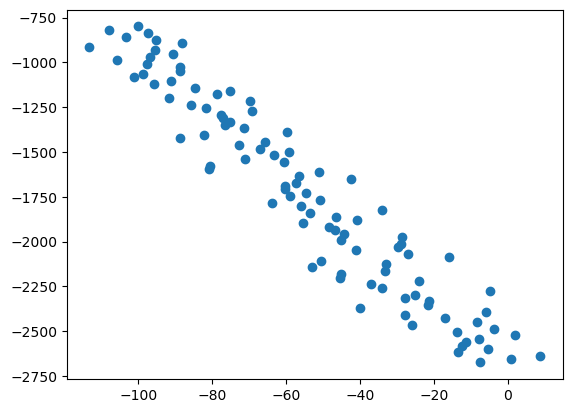

In [73]:
plt.scatter(df_noisy_X["x1"], y)

In [74]:
model_noisy = slm.OLS(endog=y, exog=df_noisy_X)
model_noisy_results = model_noisy.fit()
model_noisy_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          4.666e+04
Date:                Wed, 21 Sep 2022   Prob (F-statistic):                   4.53e-153
Time:                        17:32:22   Log-Likelihood:                         -528.87
No. Observations:                 100   AIC:                                      1064.
Df Residuals:                      97   BIC:                                      1072.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.0335      0.096     52.275      0.000       4.842       5.225
x2            -0.7635      0.504     -1.515      0.133      -1.763       0.236
x3            -2.6229      0.025   -103.666      0.000      -2.673      -2.573
==============================================================================
Omnibus:                        0.574   Durbin-Watson:                   2.293
Prob(Omnibus):                  0.750   Jarque-Bera (JB):                0.704
Skew:                          -0.082   Prob(JB):                        0.703
Kurtosis:                       2.623   Cond. No.                         63.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Problem 4:** Finally, let's test how OLS works against non-Gaussian noise.  Add an exponential noise distribution instead of Gaussian noise to your $y$ vector (make sure to use a new variable and copy your exact data from Problem 1 and 2 rather than adding even more noise to the data arrays you created in Problem 3).

In [75]:
the_rng = np.random.default_rng(seed=7)
matrix_noise = the_rng.exponential(scale=10.0, size=df_X.shape)
matrix_noise.shape

(100, 3)

In [76]:
df_noisy_X = df_X + matrix_noise

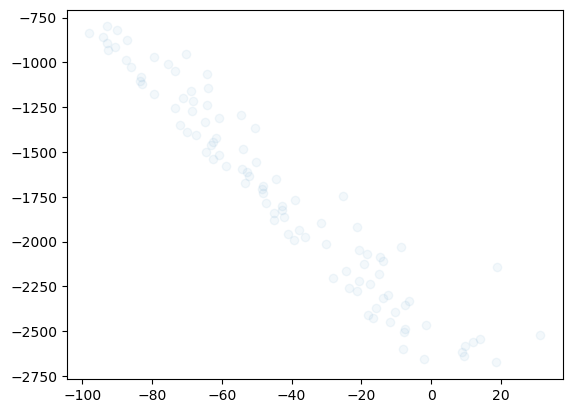

In [77]:
plt.scatter(df_noisy_X["x1"], y, alpha=0.05)

In [78]:
model_noisy = slm.OLS(endog=y, exog=df_noisy_X)
model_noisy_results = model_noisy.fit()
model_noisy_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          3.842e+04
Date:                Wed, 21 Sep 2022   Prob (F-statistic):                   5.57e-149
Time:                        17:33:13   Log-Likelihood:                         -538.58
No. Observations:                 100   AIC:                                      1083.
Df Residuals:                      97   BIC:                                      1091.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.0439      0.121     41.809      0.000       4.804       5.283
x2            -0.6300      0.500     -1.259      0.211      -1.623       0.363
x3            -2.6683      0.031    -85.720      0.000      -2.730      -2.606
==============================================================================
Omnibus:                       20.251   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.443
Skew:                          -0.796   Prob(JB):                     4.49e-09
Kurtosis:                       5.587   Cond. No.                         58.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# estimated_y = (5.3095 * df_X["x1"] + -0.3681 * df_X["x2"] + -2.6677 * df_X["x3"])
estimated_y = (5.0439	 * df_X["x1"] + -0.6300 * df_X["x2"] + -2.6683 * df_X["x3"])

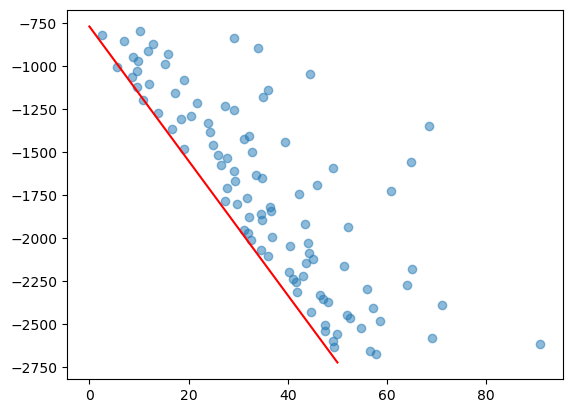

In [82]:
plt.scatter(df_noisy_X["x2"], y, alpha=0.5)
plt.plot(df_X["x2"], estimated_y, color="red")

**Problem 5:** Compare and contrast your results.  Then, try searching to see if there are ways you can improve your regression model by using different assumptions about the residuals in `statsmodels`; for instance, robust least squares.  What did you find? 

The next cell is a Markdown cell for you to write your answer to this problem.

## Section 2: Analyzing building designs for energy efficiency

In this section, you'll practice analyzing a real-world dataset and attempt to draw some statistical conclusions (inference and regression modeling) from this data.  This section will walk you through the steps of data exploration and visualization, data cleanup (if needed), preliminary modeling, and finally inference.

**Dataset:** `datasets_ml/building_energy_efficiency.csv` (Dataset creators: Angeliki Xifara and Athanasios Tsanas)

**Dataset description:** A dataset containing energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses.

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2):

- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution
- y1 Heating Load
- y2 Cooling Load

**Our overarching research problem:** Can we build a regression model to predict the heating or cooling load? Which features work best?

**Problem 6:** Import the data and perform some initial data analysis and visualization.

In [89]:
import pandas as pd
import seaborn as sns

df_building = pd.read_csv("../datasets_ml/building_energy_efficiency.csv")
df_building = df_building.dropna()
df_building.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


**Problem 7:** Now, build a linear regression model to estimate the heating load (do not use the cooling load as a feature).  How well does your model work?  How do you know?

In [90]:
df_heating_X = df_building.drop(columns=["Heating Load", "Cooling Load"])
df_heating_X.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0


In [91]:
df_heating_y = df_building["Heating Load"]
df_heating_y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Heating Load, dtype: float64

In [92]:
model_heating = slm.OLS(endog=df_heating_y, exog=df_heating_X)
model_heating_results = model_heating.fit()
model_heating_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Heating Load   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              7347.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):                        0.00
Time:                        17:42:52   Log-Likelihood:                         -1922.2
No. Observations:                 768   AIC:                                      3858.
Df Residuals:                     761   BIC:                                      3891.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Relative Compactness        -20.0442      1.806    -11.101      0.000     -23.589     -16.500
Surface Area                 -0.0037      0.001     -2.912      0.004      -0.006      -0.001
Wall Area                     0.0322      0.004      8.497      0.000       0.025       0.040
Roof Area                    -0.0179      0.002     -7.352      0.000      -0.023      -0.013
Overall Height                5.2968      0.224     23.627      0.000       4.857       5.737
Orientation                  -0.0160      0.096     -0.167      0.867      -0.204       0.172
Glazing Area                 19.9608      0.824     24.231      0.000      18.344      21.578
Glazing Area Distribution     0.2063      0.071      2.916      0.004       0.067       0.345
==============================================================================
Omnibus:                       13.549   Durbin-Watson:                   0.608
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               23.976
Skew:                          -0.005   Prob(JB):                     6.22e-06
Kurtosis:                       3.866   Cond. No.                     2.43e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 7.73e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""